In [38]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [30]:
iris = datasets.load_iris()

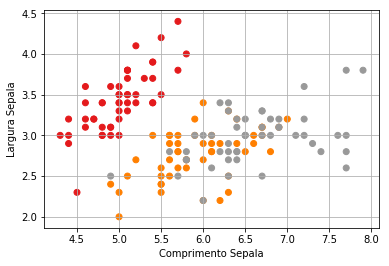

In [31]:
#Visualiza base de dados
X = iris.data[:, :2] #as duas primeiras características
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [32]:
dados = []
for i in range(len(iris['data'])):
    dados.append([list(iris['data'][i]), iris['target'][i]])

In [33]:
import knn

knn = knn.Knn(3)
knn.treina(dados[:40] + dados[51:90] + dados[101:140])

In [66]:
y_valido = numpy.concatenate([iris.target[40:50], iris.target[90:100], iris.target[140:150]])
aux = (dados[40:50] + dados[90:100] + dados[140:150])
y_predito = []
for i in range(len(aux)):
    y_predito.append(knn.prediz(aux[i]))
print(y_predito)
print(y_valido)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [68]:
knn.prediz(dados[41])

0

In [70]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_valido,y_predito))  
print(classification_report(y_valido,y_predito))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

